# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import math
%matplotlib inline
from __future__ import division
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score
from IPython.core.display import Image, HTML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Imports date into the datafram df
df = pd.read_csv('Iowa_Liquor_Sales_reduced.csv')

#Drop NAs from dataset. Also, I used only Davenport while coding to make it run faster.
#df = df[df['City']=='DAVENPORT']
df = df.dropna()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

In [2]:
#Removes unnecesary columns from dataset

del df['Volume Sold (Gallons)']
del df['Item Number'] 
del df['Bottle Volume (ml)']
del df['State Bottle Cost']
del df['State Bottle Retail']
del df['Bottles Sold']
del df['Vendor Number']

In [3]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,4.50
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,2.00
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,10.50
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,9.60
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,0.75


In [4]:
#Function reassigns alcohol type into broader buckets and puts all small categories into 'OtherAlcohol'

#def liquortype(value,value2):
def liquortype(value):
    if 'GIN' in value:
        return 'Gin'
    elif 'RYE' in value:
        return 'Whisky'
    elif 'VODKA' in value:
        return 'Vodka'
    elif 'RUM' in value:
        return 'Rum'
    elif 'SCOTCH' in value:
        return 'Whisky'
    elif 'TEQUILA' in value:
        return 'Tequila'
    elif 'WHISKIES' in value or 'WHISKY' in value:
        return 'Whisky'
    elif 'SCHNAPPS' in value:
        return 'Liqueurs'
    elif 'AMARETTO' in value:
        return 'Liqueurs'
    elif 'CREME' in value:
        return 'Liqueurs'
    elif 'BRANDIES' in value:
        return 'Brandy'
    elif 'BOURBON' in value:
        return 'Whisky'
    elif 'LIQUEUR' in value:
        return 'Liqueurs'
    elif 'CORDIAL' in value:
        return 'Liqueurs'
    elif 'ANISETTE' in value:
        return 'Liqueurs'
    else: return "OtherAlcohol"

df['Category Name'] = df['Category Name'].astype(str)
#df['LiquorType'] = df.apply(lambda row: liquortype(row['Category Name'], row['Item Description']), axis=1)
df['LiquorType'] = df['Category Name'].to_frame().applymap(liquortype)
df.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters),LiquorType
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,4.50,Tequila
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,2.00,Tequila
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,10.50,OtherAlcohol
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,9.60,Vodka
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,0.75,Whisky
6,03/31/2016,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,Dr. Mcgillicuddy's Cherry Schnapps,$52.04,3.00,Liqueurs
7,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Silver Tequila,$252.00,4.50,Tequila
8,03/31/2016,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,Christian Bros Brandy,$106.50,10.50,Brandy
9,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,Remy Martin Vsop (flask),$191.88,4.50,Brandy
10,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Tequila Silver,$486.00,9.00,Tequila


In [5]:
#Checks value counts for LiquorType after recategorizing

df['LiquorType'].value_counts()

Whisky          741168
Vodka           699426
Liqueurs        447355
Rum             225086
Gin             198576
Brandy          148012
Tequila         121235
OtherAlcohol    111744
Name: LiquorType, dtype: int64

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [6]:
#Turns LiquorType into dummy variables to later be used for regression

df['key'] = range(len(df['LiquorType']))
df = pd.concat([df.drop('key',axis=1),pd.get_dummies(df['LiquorType'])], axis = 1)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters),LiquorType,Brandy,Gin,Liqueurs,OtherAlcohol,Rum,Tequila,Vodka,Whisky
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,4.50,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,2.00,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,10.50,OtherAlcohol,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,9.60,Vodka,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,0.75,Whisky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
#Reduces number of counties to 7 plus an 'Other' category

def countydummy(value):
    if value == 'Polk':
        return 'Polk'
    elif value == 'Linn':
        return 'Linn'
    elif value == 'Scott':
        return 'Scott'
    elif value == 'Black Hawk':
        return 'Black Hawk'
    elif value == 'Johnson':
        return 'Johnson'
    elif value == 'Woodbury':
        return 'Woodbury'
    elif value == 'Dubuque':
        return 'Dubuque'
    else:
        return 'OtherCounty'

df['CountyDummy'] = df['County'].to_frame().applymap(countydummy)
df.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),...,LiquorType,Brandy,Gin,Liqueurs,OtherAlcohol,Rum,Tequila,Vodka,Whisky,CountyDummy
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,...,OtherAlcohol,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Black Hawk
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,...,Vodka,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Polk
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,...,Whisky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Black Hawk
6,03/31/2016,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,Dr. Mcgillicuddy's Cherry Schnapps,$52.04,...,Liqueurs,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Black Hawk
7,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Silver Tequila,$252.00,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott
8,03/31/2016,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,Christian Bros Brandy,$106.50,...,Brandy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Polk
9,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,Remy Martin Vsop (flask),$191.88,...,Brandy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scott
10,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Patron Tequila Silver,$486.00,...,Tequila,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Scott


In [8]:
#Turns Counties into dummy variables to later be used for regression

df['key'] = range(len(df['CountyDummy']))
df = pd.concat([df.drop('key',axis=1),pd.get_dummies(df['CountyDummy'])], axis = 1)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Description,Sale (Dollars),...,Whisky,CountyDummy,Black Hawk,Dubuque,Johnson,Linn,OtherCounty,Polk,Scott,Woodbury
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Avion Silver,$179.88,...,0.0,Scott,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,Jose Cuervo Especial Reposado Tequila,$37.50,...,0.0,Scott,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,Uv Blue Raspberry Lemonade Pet,$53.76,...,0.0,Black Hawk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,New Amsterdam Red Berry,$161.28,...,0.0,Polk,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,Bulleit Bourbon 10YR,$34.50,...,1.0,Black Hawk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Turns the dollar amount from the sale into a float variable.
#***This step takes significantly longer to run than any other. If you have any insight on why, I'd love to know to avoid
#in the future***

def saletofloat(value):
    value = value[1:len(value)]
    return value

df['Sale (Dollars)'] = df['Sale (Dollars)'].to_frame().applymap(saletofloat)
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype(float)


In [10]:
#This function turns the date into datetime and then adds a column for year and month so the dataframe can be broken 
#down by date

def year(value):
    return value.year

def month(value):
    return value.month

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Year'] = df['Date'].to_frame().applymap(year)
df['Month'] = df['Date'].to_frame().applymap(month)

In [11]:
#Breaks the main dataframe down into 2015, 2016, Q1 2015, Q234 2015, and Q1 2016

df2015 = df[df['Year']==2015]
df2016 = df[df['Year']==2016]
df2015q1 = df2015[df2015['Month']<4]
df2015q234 = df2015[df2015['Month']>=4]
df2016q1 = df2016[df2016['Month']<4]

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

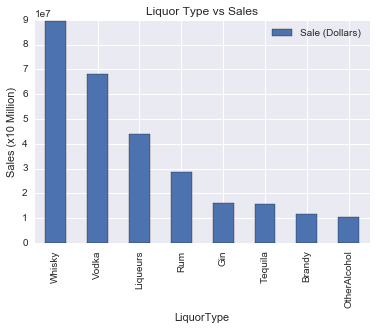

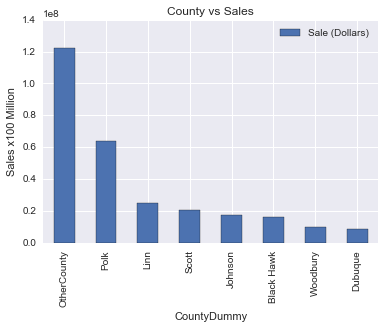

In [12]:
#Pivot tables and bar plots for sales by LiquorType and County for the 2015 year

categorysales2015 = pd.pivot_table(df2015, index = ['LiquorType'], values=['Sale (Dollars)'],
                                   aggfunc=np.sum)
categorysales2015 = categorysales2015.sort_values(['Sale (Dollars)'], ascending = False)
categorysales2015.plot(kind = 'bar')  
plt.ylabel("Sales (x10 Million)")
plt.title('Liquor Type vs Sales')

countysales2015 = pd.pivot_table(df2015, index = ['CountyDummy'], values=['Sale (Dollars)'],aggfunc=np.sum)
countysales2015 = countysales2015.sort_values(['Sale (Dollars)'], ascending = False)
countysales2015.plot(kind = 'bar')
plt.ylabel("Sales x100 Million")
plt.title('County vs Sales')

In [13]:
#prints Total Sales and Volume Sold for Q1 in 2015 and 2016. This is important when looking at predictions for 
#remainder of 2016 to see if regression makes sense.

sales2015Q1 = df2015q1['Sale (Dollars)'].sum()
sales2016Q1 = df2016q1['Sale (Dollars)'].sum()
volume2105Q1 = df2015q1['Volume Sold (Liters)'].sum()
volume2106Q1 = df2016q1['Volume Sold (Liters)'].sum()


print "2015 Q1 Sales: $%.2f" %sales2015Q1
print "2015 Volume Sold (L) %f" %volume2105Q1
print "\n"
print "2016 Q1 Sales: $%.2f" %sales2016Q1
print "2016 Volume Sold (L) %f" %volume2106Q1

2015 Q1 Sales: $62934674.68
2015 Volume Sold (L) 4392407.320000


2016 Q1 Sales: $63633748.83
2016 Volume Sold (L) 4455735.040000


The sales in Q1 increased 1.1% in 2016. This will be important in checking if regression model makes sense.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [14]:
#This pulls out the variables that we are interested in when running the linear regression (Volume sold, LiquorType, and County) for each
#of the timeframes that are of interest (All of 2015: X1, Q1 of 2015: X1Q1, Q234 of 2015: X1Q234, and Q1 of 2016: X2 )


#regressiondf2015=df2015[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott']]
regressiondf2015=df2015[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott',
                         'Black Hawk','Linn','OtherCounty','Polk','Johnson','Woodbury','Dubuque']]
X1 = regressiondf2015
Y1 = df2015['Sale (Dollars)'].to_frame()


#regressiondf2015q1=df2015q1[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott']]
regressiondf2015q1=df2015q1[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott',
                         'Black Hawk','Linn','OtherCounty','Polk','Johnson','Woodbury','Dubuque']]
X1Q1 = regressiondf2015q1
Y1Q1 = df2015q1['Sale (Dollars)'].to_frame()


#regressiondf2015q234=df2015q234[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott']]
regressiondf2015q234=df2015q234[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott',
                      'Black Hawk','Linn','OtherCounty','Polk','Johnson','Woodbury','Dubuque']]
X1Q234 = regressiondf2015q234
Y1Q234 = df2015q234['Sale (Dollars)'].to_frame()


#regressiondf2016=df2016[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott']]
regressiondf2016=df2016q1[['Volume Sold (Liters)','Brandy','Gin','Liqueurs','OtherAlcohol','Rum','Tequila','Vodka','Whisky','Scott',
                         'Black Hawk','Linn','OtherCounty','Polk','Johnson','Woodbury','Dubuque']]
X2 = regressiondf2016
Y2 = df2016q1['Sale (Dollars)'].to_frame()

In [15]:
regressiondf2015.head()

,Volume Sold (Liters),Brandy,Gin,Liqueurs,OtherAlcohol,Rum,Tequila,Vodka,Whisky,Scott,Black Hawk,Linn,OtherCounty,Polk,Johnson,Woodbury,Dubuque
525069,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
525070,10.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
525071,10.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
525072,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
525073,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
#Linear Model all 2015

lr = linear_model.LinearRegression()
lr_modelX1 = lr.fit(X1, Y1)
lrX1_r2 =  r2_score(y_true=Y1, y_pred=lr_modelX1.predict(X1))
lrX1_r2


0.71204016867795317

In [17]:
#Linear Model only Q12015

lr = linear_model.LinearRegression()
lr_modelX1Q1 = lr.fit(X1Q1, Y1Q1)
lrX1Q1_r2 =  r2_score(y_true=Y1Q1, y_pred=lr_modelX1Q1.predict(X1Q1))
lrX1Q1_r2

0.71938547476709469

In [18]:
#Linear Model only Q12016

lr = linear_model.LinearRegression()
lr_modelX2 = lr.fit(X2, Y2)
lrX2_r2 =  r2_score(y_true=Y2, y_pred=lr_modelX2.predict(X2))
lrX2_r2

0.70713655400749065

In [19]:
#Linear Model only Q234 2015

lr = linear_model.LinearRegression()
lr_modelX1Q234 = lr.fit(X1Q234, Y1Q234)
lrX1Q234_r2 =  r2_score(y_true=Y1Q234, y_pred=lr_modelX1Q234.predict(X1Q234))
lrX1Q234_r2

0.70978602436661709

In [20]:
#Calculates predictions for 2015 Q234 for each of the models in order to see which model performs best.

X1predictionsY1Q234 = lr_modelX1.predict(X1Q234)
print "Y1Q234 Predict(X1):   $%.2f" % (X1predictionsY1Q234.sum())

X1Q1predictionsY1Q234 = lr_modelX1Q1.predict(X1Q234)
print "Y1Q234 Predict(X1Q1): $%.2f "% (X1Q1predictionsY1Q234.sum())

X2predictionsY1Q234 = lr_modelX2.predict(X1Q234)
print "Y1Q234 Predict(X2):   $%.2f" % (X2predictionsY1Q234.sum())

print "Actual Y1Q234: \t      $%.2f" % (Y1Q234.sum())

Y1Q234 Predict(X1):   $219831524.00
Y1Q234 Predict(X1Q1): $215796102.27 
Y1Q234 Predict(X2):   $214250808.02
Actual Y1Q234: 	      $220978128.93


The prediction of Q234 of 2015 above was most accurately modeled by the X1 model which is built from the entire 2015 year. This predicted model is within 1%

In [21]:
#Using our X1 model, this predicts sales of Q1 of 2016 and compares against actual sales.

X1predictionsY2 = lr_modelX1.predict(X2)
print "Y2 Predict(X1):   $%.2f" % (X1predictionsY2.sum())
print "Actual: \t  $%.2f" % (Y2.sum())

Y2 Predict(X1):   $65189055.79
Actual: 	  $63633748.83


The X1 model shown above predicted sales for Q2 within 2.5%.

In [22]:
#This runs a lasso linear regression using all of 2015 sales and predicts Q234 2015 sales.

lasso = linear_model.Lasso(alpha=1)
lasso_model = lasso.fit(X1, Y1)
lasso_r2 = r2_score(y_true=Y1, y_pred=lasso_model.predict(X1))
print "R2: \t \t %f" % (lasso_r2)
print "Mean Coef: \t %f" % (abs(lasso_model.coef_).mean())
print "Y2 Predict: \t $%.2f" % (lasso_model.predict(X1Q234).sum())
print "Actual: \t $%.2f" % (Y1Q234.sum())

R2: 	 	 0.711475
Mean Coef: 	 8.895760
Y2 Predict: 	 $219908577.31
Actual: 	 $220978128.93


The lasso model above predicted Q1 2016 sales within 1%.

In [23]:
#Runs Cross Val Score on the linear regression model X1 and lasso regression.

crossvalscorelr = cross_val_score(lr, X1, Y1, n_jobs=1, cv=5)
crossvalscorelasso = cross_val_score(lasso, X1, Y1, n_jobs=1, cv=5)

print "CrossValScore LR:    %f"%(crossvalscorelr.mean())
print "CrossValScore Lasso: %f"%(crossvalscorelasso.mean())

CrossValScore LR:    0.711336
CrossValScore Lasso: 0.710751


In [24]:
#Using Lasso X1 model that performed the best above, this predicts Q234 of 2016.

X1predictionsY2Q234 = lasso_model.predict(X1Q234)
print "Y2Q234 Predict(X2):   $%.2f" % (X2predictionsY1Q234.sum())

Y2Q234 Predict(X2):   $214250808.02


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

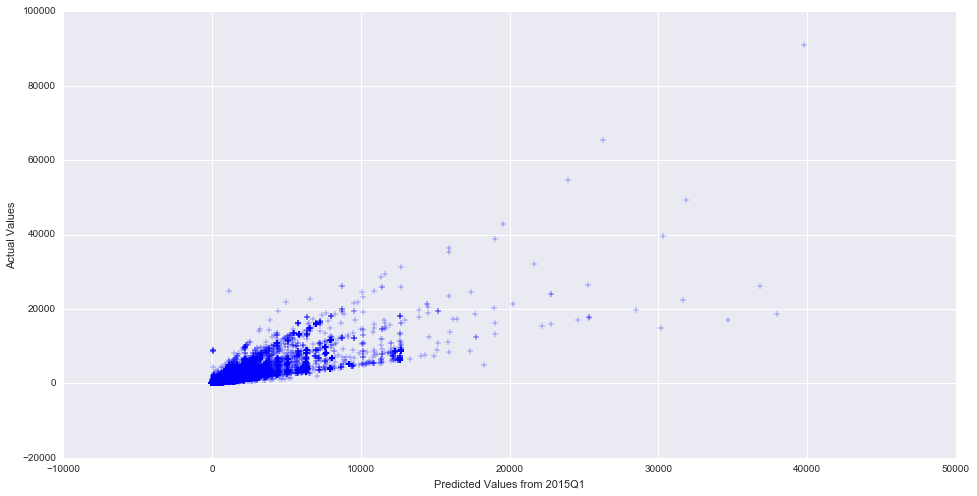

MSE: 47128.6422975


In [25]:
#This plots the predicted values of Q234 2015 against actual values of Q234 2015 using X1 model.

plt.figure(figsize=(16,8))
plt.scatter(X1predictionsY1Q234,Y1Q234, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from 2015Q1")
plt.ylabel("Actual Values")
plt.show()
print "MSE:", mean_squared_error(Y1Q234, X1predictionsY1Q234)

# Conclusions


Using alcohol sales data from the entire year 2015 in Iowa, I was able to build a linear regression model (X1) to predict revenue based on type of alochol purhcased, location (county), and volume sold in liters.

To test the model, I predicted the sales for the last 9 months of 2015 (Q234). The predicted and actual values are listed below:

Predicted: $219,831,524.00

Actual:    $220,978,128.93

This predicted sales for Q234 of 2015 are within 1% of the actual sales.

Now, we're interested in Q234 of 2016. We can predict the sales using the same Lasso X1 model for Q234 of 2016 and add to the existing Q1 of 2016 data to calculate the entire 2016 revenue predictions.

Predicted Q234 of 2016:   $220,978,128.93

#### TOTAL 2016 Sales Prediction: $284,611,877.76

